In [50]:
# Importar librerías
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

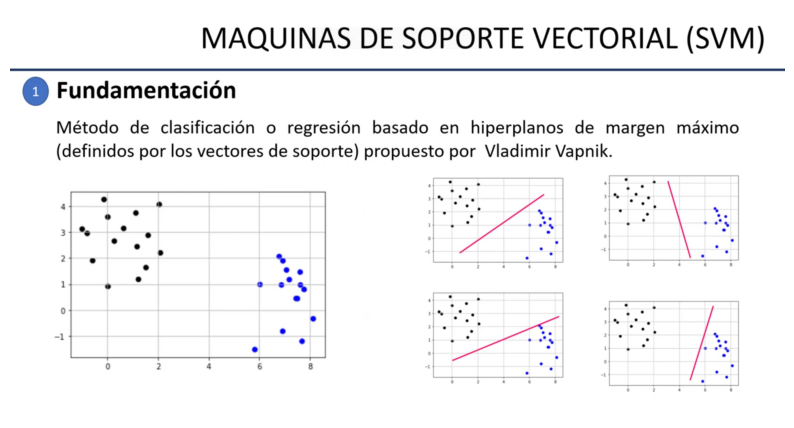

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/SVM_C.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

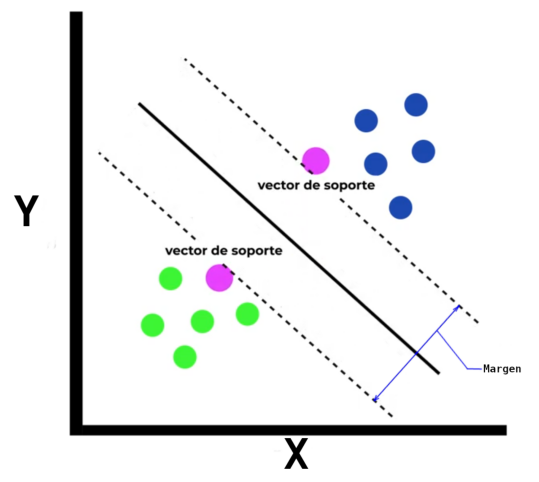

In [64]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/VectoresSoporte.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

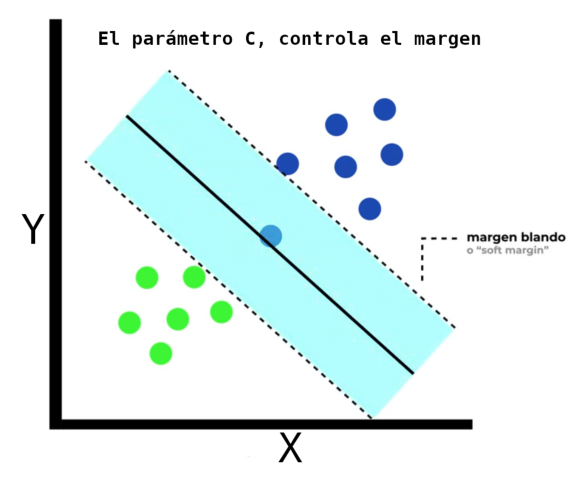

In [65]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/SVM_C_MargenBlando.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

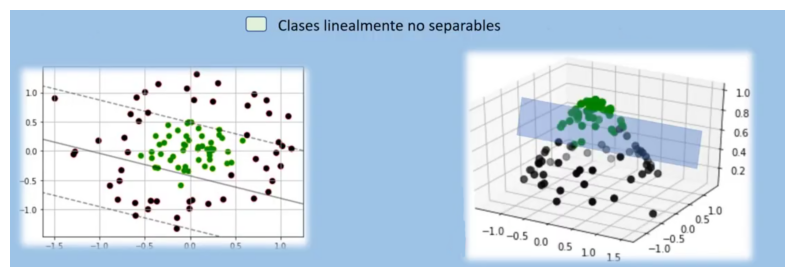

In [66]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.figure(figsize=(10, 6))
img = mpimg.imread('Imagenes/SVM_C_Kernel.png')
plt.imshow(img)
plt.axis('off')  # Opcional: oculta los ejes
plt.show()

In [51]:
# 1. Cargar el dataset y convertirlo en DataFrame
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Separar X (características) e y (etiqueta) usando .drop()
X = df.drop('target', axis=1)
y = df['target']
# df['target'] = df['target'].map({0: 'malignant', 1: 'benign'})  # etiquetas legibles

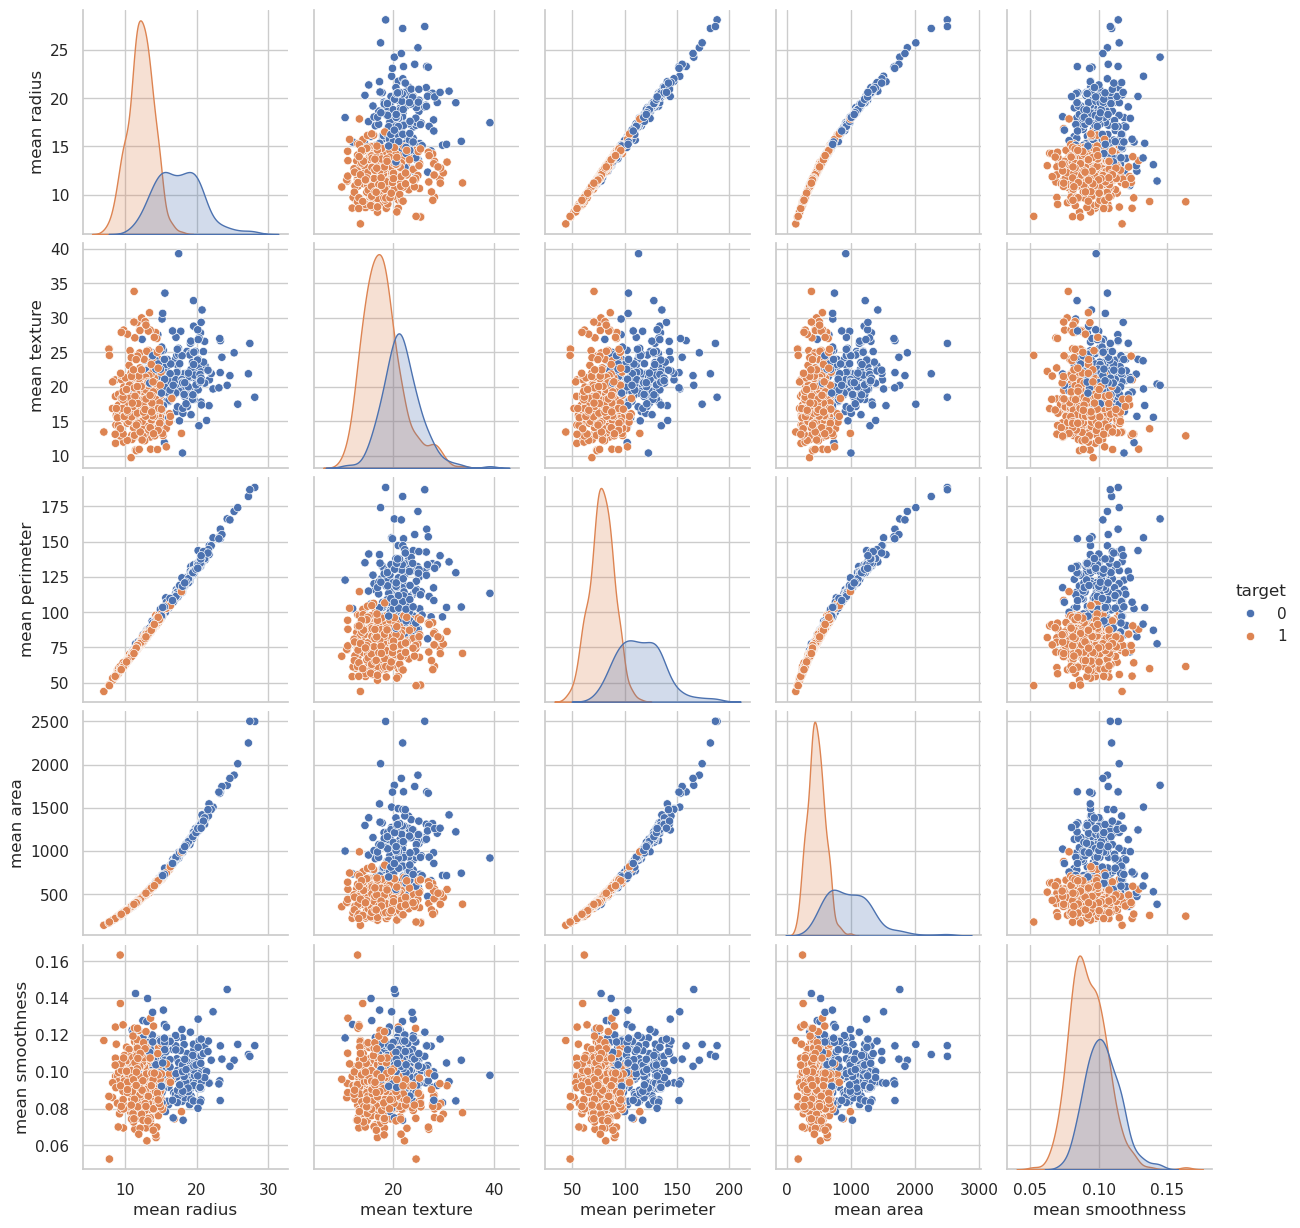

In [52]:
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear un pairplot y guardarlo en una variable
pairplot = sns.pairplot(df[['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness','target']], hue='target')

/tmp/ipykernel_19575/1607708641.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


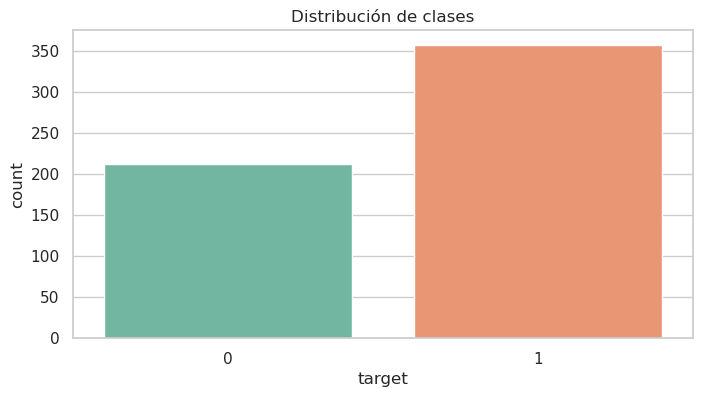

In [53]:
# 2. Visualización exploratoria con seaborn
plt.figure(figsize=(8, 4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribución de clases')
plt.show()

In [54]:
# 3. División en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [55]:
# 4. Escalar características (muy importante para SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [56]:
# 5. Entrenar el modelo SVM con kernel lineal
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train_scaled, y_train)

SVC(kernel='linear', random_state=42)

In [57]:
# 6. Predicciones
y_pred = svm.predict(X_test_scaled)

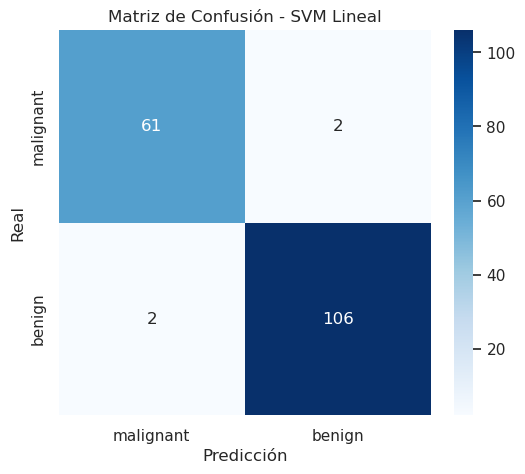

In [58]:
# 7. Matriz de confusión
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - SVM Lineal')
plt.show()

In [59]:
# 8. Reporte de clasificación
print("Reporte de Clasificación:\n")
print(classification_report(y_test, y_pred, target_names=data.target_names))

Reporte de Clasificación:

              precision    recall  f1-score   support

   malignant       0.97      0.97      0.97        63
      benign       0.98      0.98      0.98       108

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



In [153]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns

# 1. Generar datos artificiales no linealmente separables
X, y = make_circles(n_samples=300, factor=0.3, noise=0.1, random_state=42)

# Escalar los datos (importante para SVM con kernel RBF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

<Axes: >

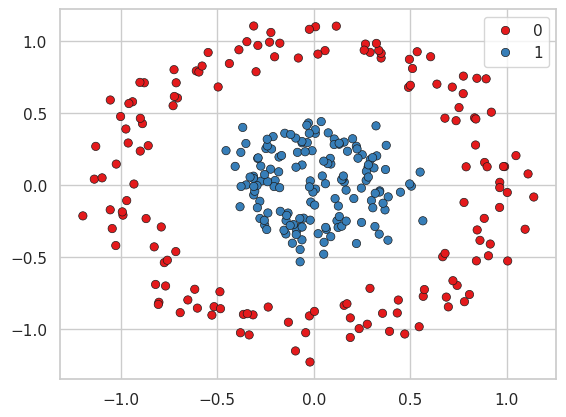

In [154]:
# Se grafican los datos
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor='k')

In [155]:
# Se divide en train/test
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [156]:
# 2. Entrenar SVM con kernel LINEAL
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

In [157]:
# Se define una función para calcular la matriz de confusión y mostrar las métricas
def evaluar_modelo(y_test, y_pred, titulo):
    print(f"\n🔍 Evaluación del modelo: {titulo}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"Matriz de confusión: {titulo}")
    plt.show()

In [206]:
# Se define una función para calcular la matriz de confusión y mostrar las métricas
def graficar_frontera(modelo, X, y, titulo):
    h = 0.02  # paso del mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = modelo.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1, alpha=0.8)
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor='k')
    plt.title(titulo)
    plt.xlabel("Característica 1")
    plt.ylabel("Característica 2")
    plt.grid(True)
    plt.show()

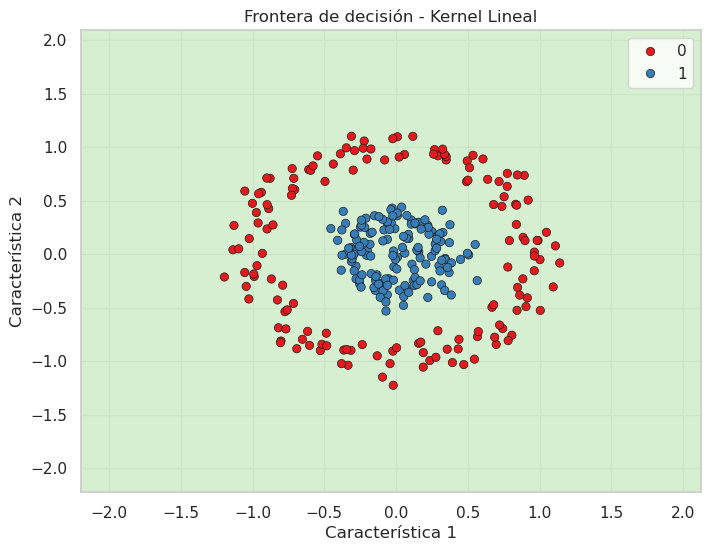

In [213]:
graficar_frontera(svm_linear, X_scaled, y, "Frontera de decisión - Kernel Lineal")


🔍 Evaluación del modelo: SVM con Kernel Lineal
              precision    recall  f1-score   support

           0       0.42      1.00      0.59        38
           1       0.00      0.00      0.00        52

    accuracy                           0.42        90
   macro avg       0.21      0.50      0.30        90
weighted avg       0.18      0.42      0.25        90



/home/hans/anaconda3/envs/CursoPython/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hans/anaconda3/envs/CursoPython/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/hans/anaconda3/envs/CursoPython/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

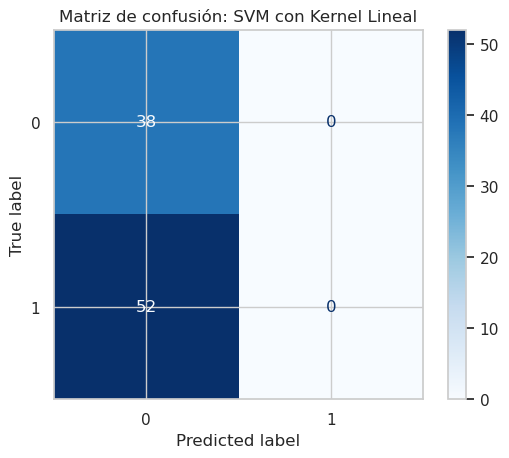

In [214]:
evaluar_modelo(y_test, y_pred_linear, "SVM con Kernel Lineal")

**Esto significa que el modelo SVM con kernel lineal, está clasificando todos los datos como clase 0, y ninguno como clase 1.**

In [215]:
## Ahora con un kernel de una función de base radial. 

In [216]:
# 3. Entrenar SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=1, gamma='scale')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)


🔍 Evaluación del modelo: SVM con Kernel RBF
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        52

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



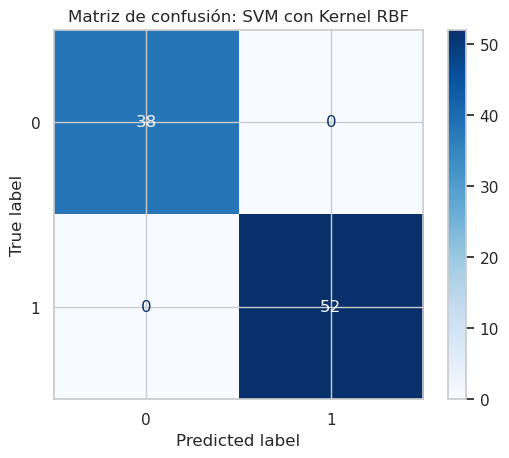

In [217]:
evaluar_modelo(y_test, y_pred_rbf, "SVM con Kernel RBF")

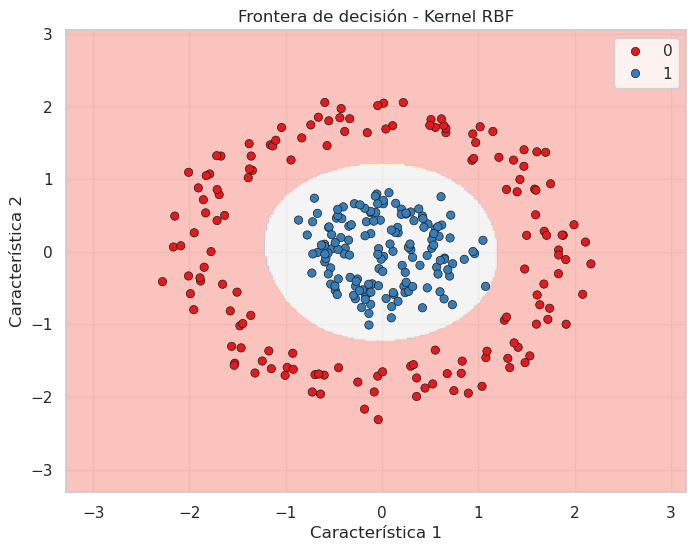

In [219]:
graficar_frontera(svm_rbf, X_scaled, y, "Frontera de decisión - Kernel RBF")

<Axes: >

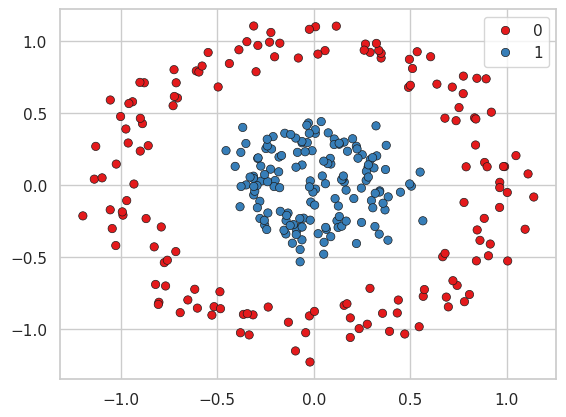

In [221]:
# Se grafican los datos
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, palette="Set1", edgecolor='k')

In [225]:
nuevo_dato = np.array([[-0.5, 0]])

In [226]:
nuevo_dato_escalado = scaler.transform(nuevo_dato)

In [227]:
prediccion = svm_rbf.predict(nuevo_dato_escalado)
print("Clase predicha:", prediccion[0])

Clase predicha: 1
